<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


#### Import the required libraries we need for the lab.


In [1]:
# import piplite
# await piplite.install(['numpy'],['pandas'])
# await piplite.install(['seaborn'])
!pip install numpy
!pip install pandas
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
# from js import fetch
# import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
# resp = await fetch(URL)
# boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(URL)
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


## Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2: Generate Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes')

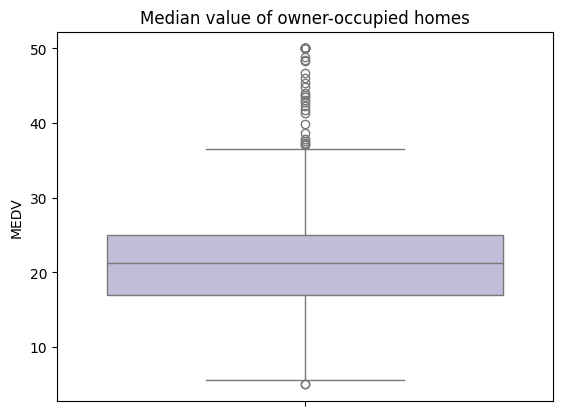

In [ ]:
# MEDV - Median value of owner-occupied homes in $1000's
ax = sns.boxplot(y="MEDV", data=boston_df, color='#BEB8DC')
plt.title('Median value of owner-occupied homes')

### Provide a  bar plot for the Charles river variable

Text(0, 0.5, 'Count')

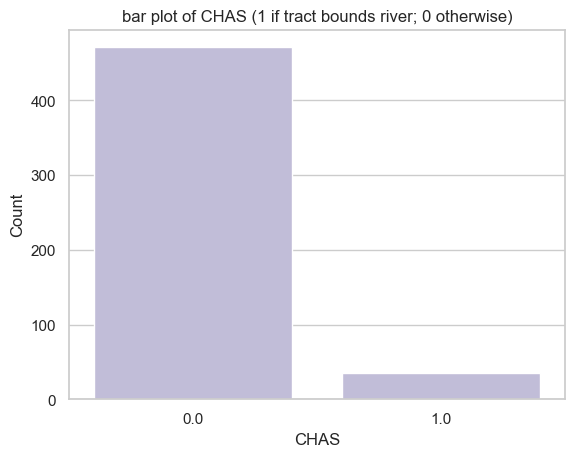

In [6]:
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
sns.set(style="whitegrid")
ax = sns.countplot(x="CHAS", data=boston_df, color='#BEB8DC')
plt.title('bar plot of CHAS (1 if tract bounds river; 0 otherwise)')
plt.xlabel('CHAS')
plt.ylabel('Count')

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0, 0.5, 'MEDV (Median value of owner-occupied homes)')

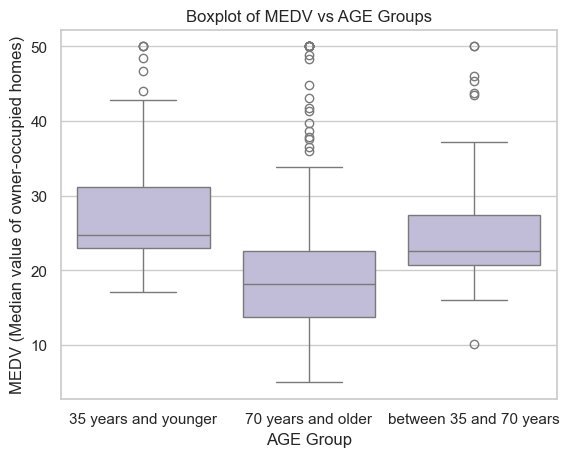

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
boston_df['age_group'] = boston_df['age_group'].astype('category')
sns.set(style="whitegrid")
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df, color='#BEB8DC')
plt.title('Boxplot of MEDV vs AGE Groups', )
plt.xlabel('AGE Group')
plt.ylabel('MEDV (Median value of owner-occupied homes)')

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?



the points generally trend upward from left to right, it suggests a positive correlation between NOX and INDUS

Text(0, 10, 'the points generally trend\n upward from left to right, \nit suggests a positive correlation\n between NOX and INDUS')

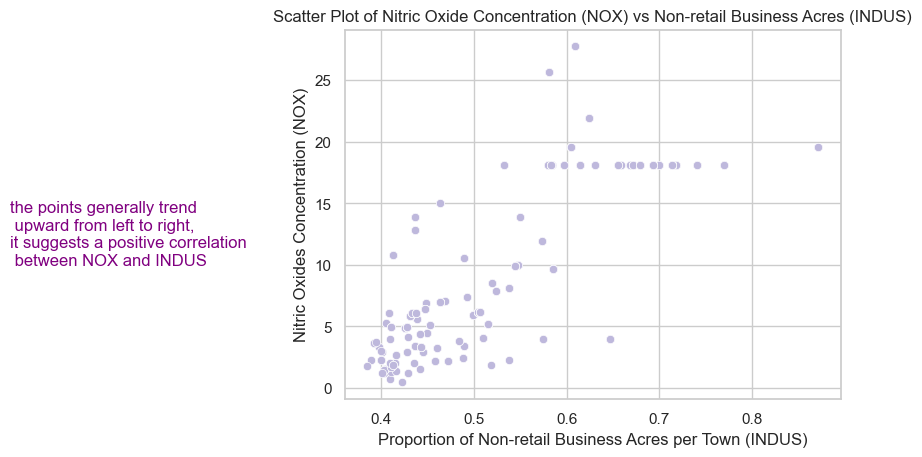

In [8]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='#BEB8DC')
plt.title('Scatter Plot of Nitric Oxide Concentration (NOX) vs Non-retail Business Acres (INDUS)')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.text(0, 10, "the points generally trend\n upward from left to right, \nit suggests a positive correlation\n between NOX and INDUS", color='purple')

### Create a histogram for the pupil to teacher ratio variable

Text(0, 0.5, 'Frequency')

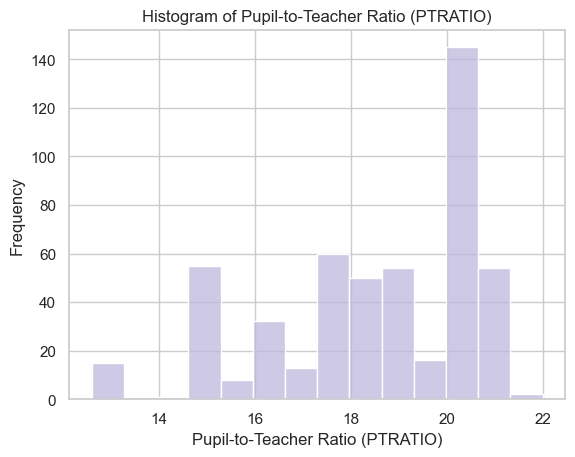

In [9]:
ax = sns.histplot(x='PTRATIO', data=boston_df, color='#BEB8DC')
plt.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')

## Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Initially, we had used the t-test to test if there was a significant difference in median value of houses bounded by the Charles river or not, we are now going to use regression. We will state the null hypothesis:
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not



In [10]:
# Houses bounded by the Charles River: boston_df[boston_df['CHAS'] == 1]['MEDV']
# Houses not bounded by the Charles River: boston_df[boston_df['CHAS'] == 0]['MEDV']
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True) # Assuming equal variances

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519902e-05, df=504.0)

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ

**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is no significant evidence that at least one of the means differ.

In [11]:
# Group the data by age_group and get the MEDV values for each group
thirtyfive_lower_eval = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy_eval = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older_eval = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# Perform one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_eval, thirtyfive_seventy_eval, seventy_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:
* $H_0:$ Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
* $H_1:$ Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between  bNitric oxide concentrations and proportion of non-retail business acres per town.


In [12]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

* Use "weighted distance  to the five Boston employment centres" variable

- Intercept (const): The estimated median home value when the weighted distance (DIS) is zero is approximately 18.39 (in units of $1000).
- Slope (DIS): The slope is approximately 1.09, which means that for each additional unit of weighted distance (each additional unit of DIS), the median value of homes (MEDV) is expected to increase by about 1.09 units of $1000.
- P-value: The p-value for DIS is very small (less than 0.05), suggesting that the relationship between DIS and MEDV is statistically significant.

#### Conclusion:
1. Based on the results, we can conclude that there is a positive relationship between the weighted distance to the five Boston employment centers (DIS) and the median value of owner-occupied homes (MEDV).
2. As the weighted distance to employment centers increases, the median value of homes tends to increase. The relationship is statistically significant, and the model suggests that each additional unit of weighted distance increase the median home value by approximately $1,091.

In [13]:
## insert code here
X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        02:41:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'MEDV')

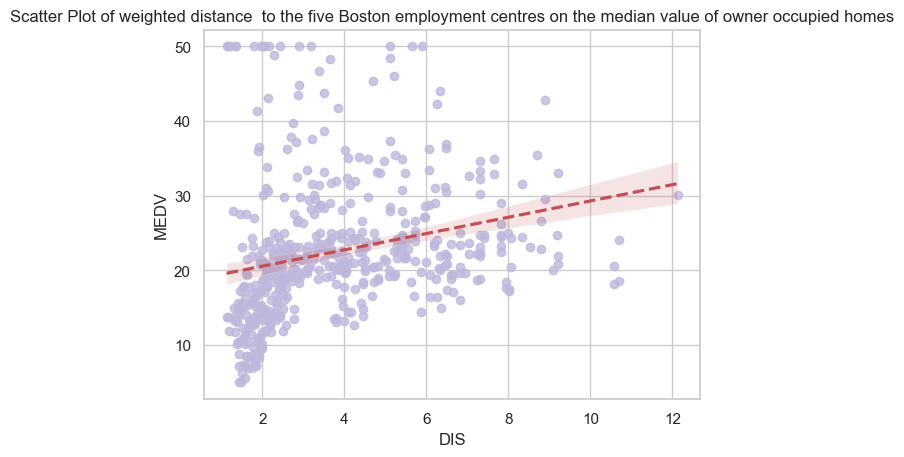

In [14]:
ax = sns.regplot(x='DIS', y='MEDV', data=boston_df, color='#BEB8DC', line_kws={'linestyle':'--','color':'r'})
plt.title('Scatter Plot of weighted distance  to the five Boston employment centres on the median value of owner occupied homes')
plt.xlabel('DIS')
plt.ylabel('MEDV')